<class 'list'> <class 'list'>
The 18th sample is change point. Kt=193.00, Year:2008, p=0.00066
The 18th sample is change point. Year:2008, p=0.000663892


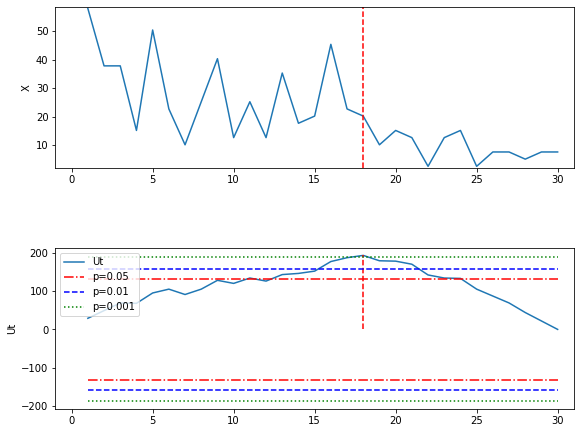

In [1]:
import numpy as np
import pandas as pd
import sys, math
import matplotlib.pyplot as plt

data = pd.read_excel("PDtest1.xlsx")

def pettitt(X):
	# second one
	U = []; s = 0
	U.append(sum(np.sign(X[0] - np.array(X[:]))))
	for t in range(1, len(X)):
		v_t = sum(np.sign(X[t] - np.array(X[:])))
		U.append(U[t-1] + v_t)
	Kt = max(np.abs(U))
	max_idx = list(np.abs(U)).index(max(np.abs(U)))
	return U, max_idx, Kt

def plot(X, Ut, Kt, max_idx):
	fig = plt.figure(figsize = (9, 6))
	plt.subplots_adjust(left=0.1, right=0.9, top=0.98, bottom=0.05, wspace=None, hspace=0.5)
	axes = []
	for i in range(2):
		ax = fig.add_subplot(2, 1, i + 1)
		axes.append(ax)
	# 原始数据
	axes[0].plot(range(1, len(X) + 1), X)
	axes[0].plot([max_idx + 1, max_idx + 1], [min(X) - 0.5, max(X) + 0.5], linestyle = "--", c = "r")
	# axes[0].set_xlabel("Index")
	axes[0].set_ylabel("X")
	axes[0].set_xlim((0 - 1, len(X) + 1))
	axes[0].set_ylim((min(X) - 0.5, max(X) + 0.5))

	axes[1].plot(range(1, len(Ut) + 1), np.abs(Ut), label = "Ut")
	axes[1].plot([max_idx + 1, max_idx + 1], [0, Kt], linestyle = "--", c = "r")

	Kt_005, Kt_005_n = CalKtByAlpha(0.05, len(X))
	axes[1].plot([1, len(Ut)], [Kt_005, Kt_005], linestyle = "-.", c = "r")
	axes[1].plot([1, len(Ut)], [Kt_005_n, Kt_005_n], linestyle = "-.", c = "r", label = "p=0.05")

	Kt_001, Kt_001_n = CalKtByAlpha(0.01, len(X))
	axes[1].plot([1, len(Ut)], [Kt_001, Kt_001], linestyle = "--", c = "b")
	axes[1].plot([1, len(Ut)], [Kt_001_n, Kt_001_n], linestyle = "--", c = "b", label = "p=0.01")

	Kt_0001, Kt_0001_n = CalKtByAlpha(0.001, len(X))
	axes[1].plot([1, len(Ut)], [Kt_0001, Kt_0001], linestyle = ":", c = "g")
	axes[1].plot([1, len(Ut)], [Kt_0001_n, Kt_0001_n], linestyle = ":", c = "g", label = "p=0.001")
	
	axes[1].set_xlim((0 - 1, len(X) + 1))
	axes[1].set_ylabel("Ut")
	plt.legend(loc = "upper left")
	plt.show()

def CalP(Kt, n):
	return 2.0 * math.exp((-6.0 * Kt ** 2) / float(n ** 3 + n ** 2))

def CalKtByAlpha(alpha, n):
	Kt = math.sqrt(np.log(alpha / 2.0) / -6.0 * (n ** 3 + n ** 2))
	return Kt, -Kt

def main():
	alpha = 0.05
# 	data = pd.read_csv("data_random.csv")
	Year = list(data["year"])
	X = list(data["data_-4.81"])
	print(type(Year),type(X))

	Ut, max_idx, Kt = pettitt(X)
	print("The %dth sample is change point. Kt=%.2f, Year:%d, p=%.5f" % (max_idx + 1, Kt, Year[max_idx], CalP(Kt, len(X))))
	if CalP(Kt, len(X)) < alpha:
		print("The %dth sample is change point. Year:%d, p=%.9f" % (max_idx + 1, Year[max_idx], CalP(Kt, len(X))))
	else:
		print("Does not satisfy the significance level! P(Kt) = %.5f" % CalP(Kt, len(X)))
	plot(X, Ut, Kt, max_idx)

if __name__ == '__main__':
	main()